# Exercises Week 2 in 02506

Today we are going to do blob detection with scale space filtering.
<p align="center"> 
  <img src="./images/test_blob_varying.PNG" width="300" title="Artificially generated blobs">
</p>

## Imports

In [1]:
import numpy as np
import scipy 
from skimage.io import imread, imshow
from scipy.ndimage import gaussian_filter1d, gaussian_filter,minimum_filter, maximum_filter
import matplotlib.pyplot as plt
import cv2

## Exercise 1: Convolution with Gaussian Kernel

## Exercise 2.1.1
### 1. Derive (analytically) the second order derivative of the Gaussian
The Gaussian function is given by
$$g(x)=\frac{1}{\sqrt{2\pi t}}e^{\frac{-x^2}{2t}}$$
We may derive it by iterative applications of the chain rule:
$$\frac{\partial^2}{\partial x^2}g(x)=\frac{\partial}{\partial x}\frac{\partial}{\partial x}\frac{1}{\sqrt{2\pi t}}e^{\frac{-x^2}{2t}}$$
$$=\frac{\partial}{\partial x}\frac{1}{\sqrt{2\pi t}}\frac{-x}{t}e^{\frac{-x^2}{2t}}$$
$$=\frac{1}{\sqrt{2\pi t}}\Big(\frac{-e^{\frac{-x^2}{2t}}}{t} +\frac{x^2e^{\frac{-x^2}{2t}}}{t^2}\Big)$$

### 2. Implement a function that takes the variance t as input and outputs a filter kernel of g and $\frac{d^2g}{d x^2}$.

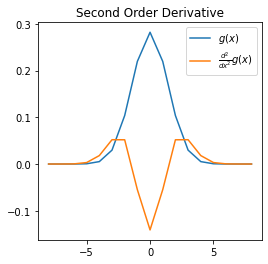

In [12]:
img = imread('./images/test_blob_uniform.png').astype(float)

# We go s pixels in each direction
def d2g_dx2(t=20):
    sigma = np.sqrt(t)
    s = np.ceil(5*sigma)
    x = np.arange(-s,1+s)
    g = 1.0/(np.sqrt(2*np.pi*t))*np.exp(-x**2/(2*t))
    ddg = 1.0/(np.sqrt(2*np.pi*t))*((-np.exp(-x**2/(2*t))/t)+x**2*(np.exp(-x**2/(2*t))/(t**2)))
    g.shape += (1,)
    return np.array(g),ddg,x

t = 2
g,ddg,x = d2g_dx2(t=t)

fig = plt.figure(figsize=(4, 4))
plt.title('Second Order Derivative')
plt.plot(x,g,label=r"$g(x)$")
plt.plot(x,ddg,label=r"$\frac{d^2}{dx^2}g(x)$")
plt.legend()


### 3. Try the filter kernel on the synthetic test image test_blob_uniform.png and inspect the result.

Text(0.5, 1.0, 'L=L_{xx}+L_{yy}')

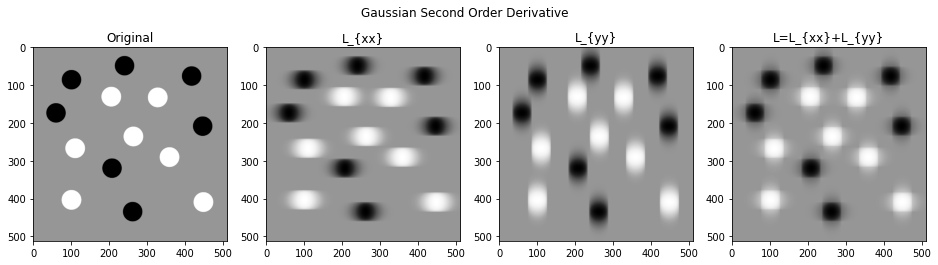

In [11]:
img_yy = cv2.filter2D(img,-1,g)
img_xx = cv2.filter2D(img,-1,g.T)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(16, 4))
fig.suptitle('Gaussian Second Order Derivative')
ax1.imshow(img,cmap='Greys')
ax1.set_title("Original")
ax2.imshow(img_xx,cmap='Greys')
ax2.set_title("L_{xx}")
ax3.imshow(img_yy,cmap='Greys')
ax3.set_title("L_{yy}")
ax4.imshow(img_xx+img_yy,cmap='Greys')
ax4.set_title("L=L_{xx}+L_{yy}")

## Exercise 2.1.2 Detecting blobs at one scale
### 1. Compute the Laplacian at one scale using the synthetic test image `test_blob_uniform.png`.

3


Text(0.5, 1.0, 'L=L_{xx}+L_{yy}')

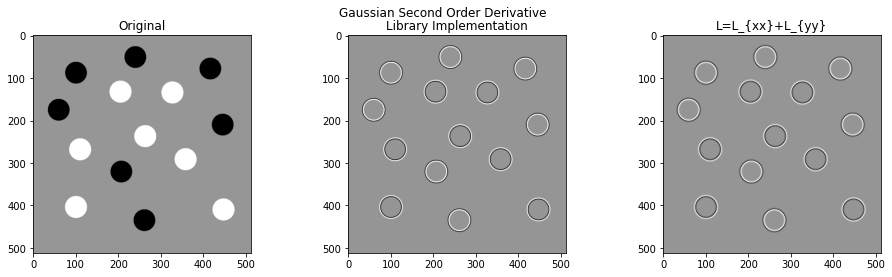

In [51]:
img = imread('./images/test_blob_uniform.png').astype(float)

# For comparison
ddepth = cv2.CV_16S
print(ddepth)
kernel_size = 5
reference = cv2.Laplacian(img,ddepth,ksize=kernel_size)

img_yy = cv2.filter2D(img,-1,g)
img_xx = cv2.filter2D(img,-1,g.T)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16, 4))
fig.suptitle('Gaussian Second Order Derivative')
ax1.imshow(img,cmap='Greys')
ax1.set_title("Original")
ax2.imshow(reference,cmap='Greys')
ax2.set_title("Library Implementation")
ax3.imshow(img_xx+img_yy,cmap='Greys')
ax3.set_title("L=L_{xx}+L_{yy}")

### 2. Create a function that detects the coordinates of maxima and minima in the Laplacian image (detect blobs), and that has an absolute value of the Laplacian larger than some threshold.

Text(0.5, 1.0, 'Local Minima')

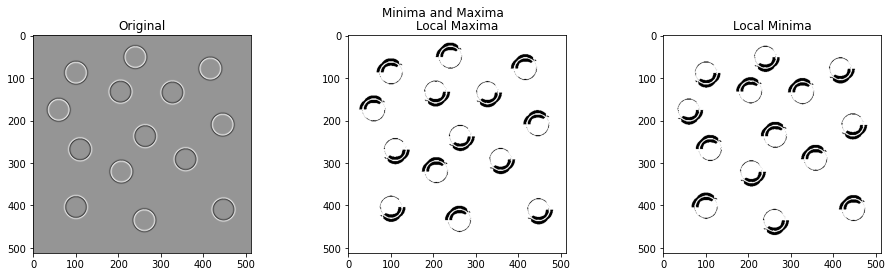

In [62]:
def find_local_max(img):
    mask = np.array([1,1,1,1,0,1,1,1,1])
    m,n = np.shape(img)
    new_img = np.zeros([m,n]);
    for i in range(1,m-1):
        for j in range(1,n-1):
            tmp = (img[np.ix_([i-1,i,i+1],[j-1,j,j+1])]).flatten()
            if img[i][j] > np.max(tmp[[1,1,1,1,0,1,1,1,1]]):
                new_img[i,j] = 1
    return new_img

def find_local_min(img):
    mask = np.array([1,1,1,1,0,1,1,1,1])
    m,n = np.shape(img)
    new_img = np.zeros([m,n]);
    for i in range(1,m-1):
        for j in range(1,n-1):
            tmp = (img[np.ix_([i-1,i,i+1],[j-1,j,j+1])]).flatten()
            if img[i][j] < np.min(tmp[[1,1,1,1,0,1,1,1,1]]):
                new_img[i,j] = 1
    return new_img

img_yy = cv2.filter2D(img,-1,g)
img_xx = cv2.filter2D(img,-1,g.T)


Lxxyy = img_yy + img_xx

fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(16, 4))
fig.suptitle('Minima and Maxima')
ax1.imshow(Lxxyy,cmap='Greys')
ax1.set_title("Original")
ax2.imshow(find_local_max(Lxxyy),cmap='Greys')
ax2.set_title("Local Maxima")
ax3.imshow(find_local_min(Lxxyy),cmap='Greys')
ax3.set_title("Local Minima")
